# Implement a simple 13-parameter function with a changing CBO frequency to see if that helps the pull at omega_a

---

In [1]:
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06


In [61]:
#f = r.TFile("../truncationTest/data/results_1MissingFile_FullVsTrunc.root")
f2 = r.TFile("../truncationTest/data/results_pileupBinning6_9day.root")
f = r.TFile("./PileupScanCorrected.root")
f.ls()

TFile**		./PileupScanCorrected.root	
 TFile*		./PileupScanCorrected.root	
  KEY: TCanvas	c1;1	c1


In [62]:
c1 = f.Get("c1")
print([x for x in c1.GetListOfPrimitives()])
clusters = c1.GetPrimitive("hi_x").Clone("clusters")
clusters.SetDirectory(0)

[<ROOT.TFrame object ("TFrame") at 0x7fffe75616c0>, <ROOT.TH1D object ("hi_x") at 0x7fffe74d73a0>, <ROOT.TPaveText object ("title") at 0x7fffe7474640>]


In [63]:
print("Binning:", clusters.GetNbinsX(),clusters.GetNbinsY(),clusters.GetNbinsZ())

Binning: 4692 1 1


In [66]:
e1 = 1700
e2 = 3100
calo = 0

#wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)
#wiggle = MakeWiggleFromTH2(clusters, e1, e2, calo, 1, True)
wiggle = MakeWiggleFromTH1(clusters, e1, e2, calo, 1, True)

In [67]:
DumpClass(wiggle)

Dumping:  <omega_a_fitting.MakeWiggleFromTH1 object at 0x7fec64032048>
Class:  <class 'omega_a_fitting.MakeWiggleFromTH1'>
    elow = 1700
    ehigh = 3100
    timeScaleFactor = 1
    caloNum = 0
    isPileupCorrected = True
    BinOrEnergy = energy
    title = Wiggle Plot for [1700 < E (MeV) < 3100] in Calo 0
    h = <ROOT.TH1D object ("wiggle_1700_3100_0") at 0x7fffe6c64e30>


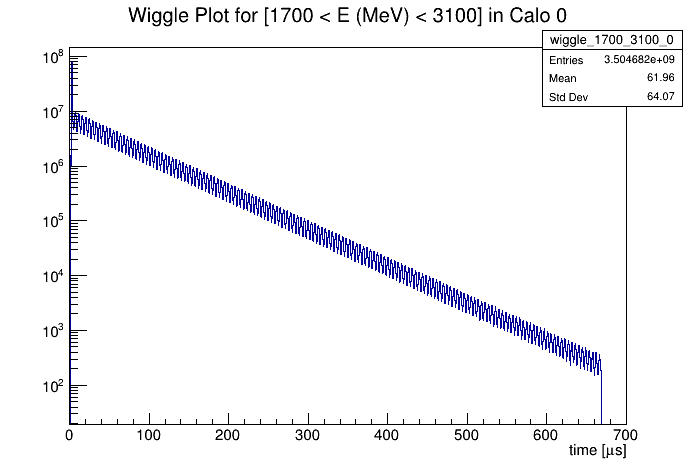

In [68]:
c = r.TCanvas()
wiggle.h.Draw("hist")
c.SetLogy()
c.Draw()

---

### Now fit the wiggle plot

In [8]:
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [9]:
DumpClass(fitFunc)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7fec6554f668>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7fec6554f630>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7fec6554f668>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [10]:
fitFunc([0],[2+x for x in range(18)])

-5.681362293202928

In [11]:
fit = BuildTF1(fitFunc, 5, "5par", "five_parameter_fit", 30, 650)
fit.SetParameters([7000000,64.4,0.33,-33,0])
fit.SetParNames()

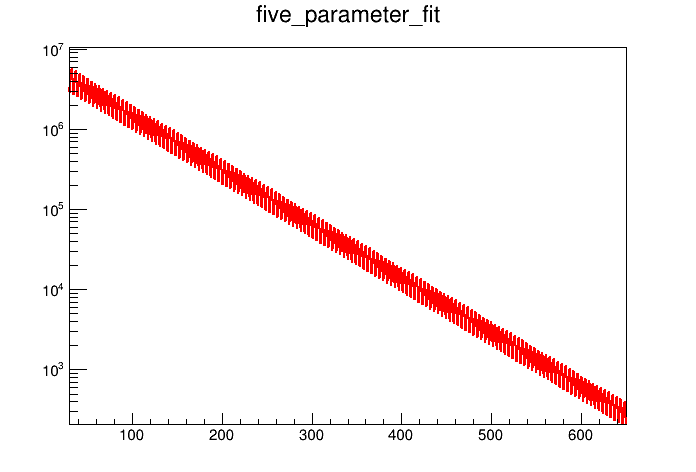

In [12]:
c = r.TCanvas()
fit.f.Draw()
c.SetLogy()
c.Draw()

In [13]:
fitter = WiggleFitter(wiggle.h, fit, "5par", "REMB", 1)

In [15]:
fitter.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  12162.564337825599 / 4151 = 2.9300323627621294
      N  =  7751276.329280475 +/- 301.79168597850514
      #tau_{#mu}  =  64.40993778199363 +/- 0.0014128809356800502
      A  =  0.37200761759636247 +/- 2.9172321577964887e-05
      R  =  -47.33668416182591 +/- 0.8791754403081816
      #phi_{a}  =  -1.0607330555660748 +/- 0.00014407534000918947
 FCN=12162.6 FROM MINOS     STATUS=SUCCESSFUL     48 CALLS         510 TOTAL
                     EDM=2.04361e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            7.75128e+06   3.01792e+02  -4.49766e-03   1.59977e-07
   2  #tau_{#mu}   6.44099e+01   1.41288e-03  -1.06127e-08   3.22725e-02
   3  A            3.72008e-01   2.91723e-05  -6.05329e-10   5.07250e-01
   4  R           -4.73367e+01   8.79175e-01  -4.27707e-06   1.25827e-05

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [16]:
fitter.ComputeFFT()

In [17]:
DumpClass(fitter)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec6554ffd0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("5par") at 0x7fffe6f2c6b0>
    f = <ROOT.TF1 object ("5par_fitter") at 0x7fffe6fc0240>
    name = 5par_fitter
    nPar = 5
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7751276.329280475, 64.40993778199363, 0.37200761759636247, -47.33668416182591, -1.0607330555660748]]
    intermediateErrors = [[301.79168597850514, 0.0014128809356800502, 2.9172321577964887e-05, 0.8791754403081816, 0.00014407534000918947]]
    intermediateChi2 = [2.9300323627621294]
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffe6f46810>
    resid = <ROOT.TH1D object ("h_resid_5par_fitter") at 0x7fffe6e72130>
    fft = <ROOT.TH1D object ("out_MAG P") at 0x7fffe738ad00>


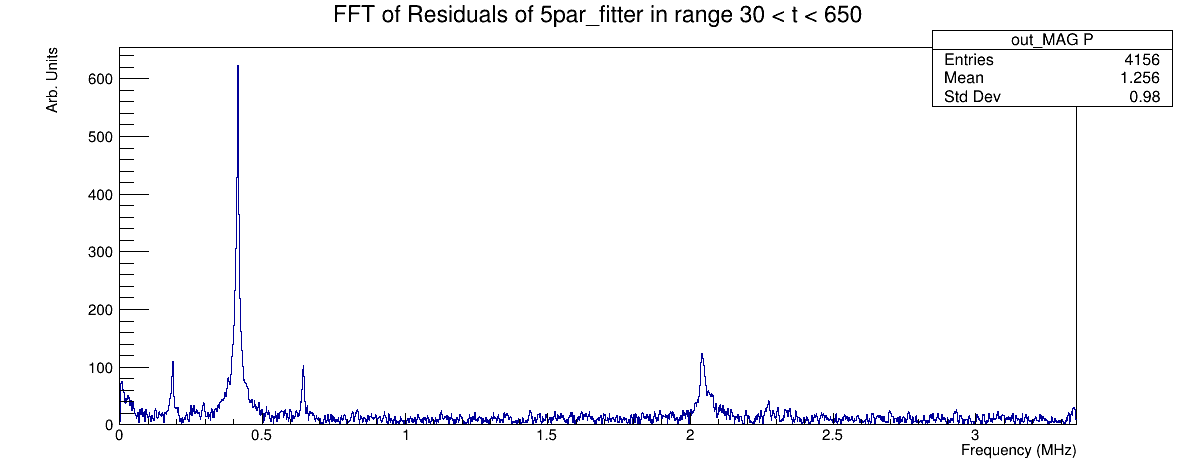

In [18]:
c = r.TCanvas("c","c",1200,500)
fitter.fft.Draw("hist")
#c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


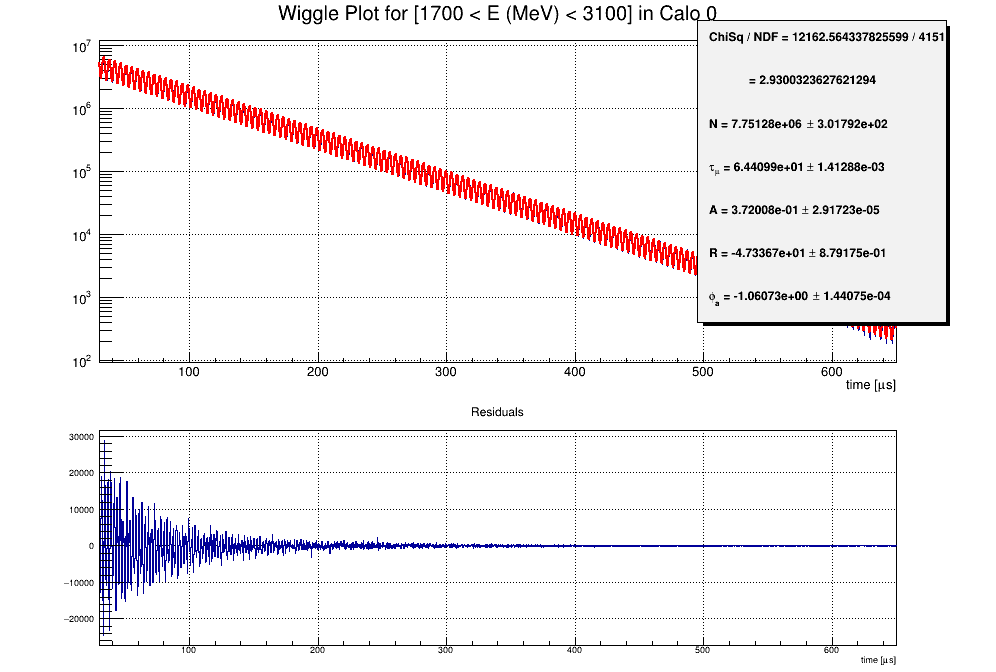

In [19]:
c = fitter.Draw()

---

### And now the '13' (really 13 + 5, with some fixed) parameter fit

In [20]:
fitFunc13 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "13par_changing")
fitFunc13.cboFrequencyModel = "elbaFixed"

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [21]:
DumpClass(fitFunc13)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7fec65559208>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7fec65559390>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7fec65559208>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [22]:
fit13 = BuildTF1(fitFunc13, 13, "13par_changing", "thirteen_parameter_fit", 30, 650)
fit13.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, 
                     -4.201648334505292, -0.666502391530784, 0.6927259503578, -0.38908021438317, 
                     210, 2.611, 0.4745581246420292, 6.299934663288357, 0.28579778778899545])
fit13.SetParLimits(8,100,10000)

fit13.ImportParameters(fitter.f)
fit13.SetParNames()

In [23]:
DumpClass(fit13)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7fec655395c0>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("thirteen_parameter_fit") at 0x7fffe742faa0>
    nPar = 13
    name = thirteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7fec65559208>
    kind = 13par_changing
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#phi_{CBO - A}', '#phi_{CBO - #phi}'], '13par_changing': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#phi_{CBO - A}', '#phi_{CBO - #phi}', '#delta#omega_{CBO}', 'A_{CBO}', '#tau_{CBO - A}', 'B_{CBO}', '#tau_{CBO - B}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#

In [24]:
fitter13 = WiggleFitter(wiggle.h, fit13, "13par", "REMB", 2)

In [25]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec655592b0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7fffe746b5f0>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7fffe7481ca0>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffe745f5f0>
    resid = None
    fft = None


In [26]:
fitter13.PrintParameters()

Parameters from this fit: 
      N  =  7751276.329280475 +/- 0.0
      #tau  =  64.40993778199363 +/- 0.0
      A  =  0.37200761759636247 +/- 0.0
      R  =  -47.33668416182591 +/- 0.0
      #phi  =  -1.0607330555660748 +/- 0.0
      A_{CBO - N}  =  -0.666502391530784 +/- 0.0
      A_{CBO - A}  =  0.6927259503578 +/- 0.0
      A_{CBO - #phi}  =  -0.38908021438317 +/- 0.0
      #tau_{CBO}  =  210.0 +/- 0.0
      #omega_{CBO}  =  2.611 +/- 0.0
      #phi_{CBO - N}  =  0.4745581246420292 +/- 0.0
      #phi_{CBO - A}  =  6.299934663288357 +/- 0.0
      #phi_{CBO - #phi}  =  0.28579778778899545 +/- 0.0


In [ ]:
c = r.TCanvas()
fitter13.f.Draw("")
c.Draw()

In [28]:
fitter13.Fit(2)

Starting fit 1 / 2
Parameters from this fit: 
     ChiSq/NDF =  4956.819529157487 / 4143 = 1.1964324231613532
      N  =  7751722.208296638 +/- 302.10305387882835
      #tau  =  64.40848652374328 +/- 0.0014135906015154693
      A  =  0.37204705453451997 +/- 2.925470451542325e-05
      R  =  -46.2461282036194 +/- 0.8810818202830327
      #phi  =  -1.060981282409237 +/- 0.00014467460406367494
      A_{CBO - N}  =  -0.00395916097655536 +/- 9.33443231445494e-05
      A_{CBO - A}  =  0.0003790150303575893 +/- 0.00016813094622096454
      A_{CBO - #phi}  =  0.0006999707164724079 +/- 0.0001742329556355547
      #tau_{CBO}  =  191.62235772004988 +/- 11.062288684867866
      #omega_{CBO}  =  2.611924077268113 +/- 0.00029949901626524967
      #phi_{CBO - N}  =  3.4369710241343485 +/- 0.024054355613087934
      #phi_{CBO - A}  =  4.3882990198928775 +/- 0.44408204691991177
      #phi_{CBO - #phi}  =  -2.6557106052863024 +/- 0.24950741846457833
Starting fit 2 / 2
Parameters from this fit: 
     Chi

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [29]:
fitter13.PrintParameters()

Parameters from this fit: 
     ChiSq/NDF =  4953.963305579423 / 4143 = 1.1957430136566312
      N  =  7751714.642013996 +/- 302.09477359706693
      #tau  =  64.40851236278088 +/- 0.001413570760822223
      A  =  0.3720462016885506 +/- 2.925175897531307e-05
      R  =  -46.27093270796601 +/- 0.8810146933800178
      #phi  =  -1.0609756553300778 +/- 0.0001446533544991129
      A_{CBO - N}  =  -0.0038215940372692972 +/- 9.150911997506438e-05
      A_{CBO - A}  =  0.0003609159990496666 +/- 0.00016227584726068964
      A_{CBO - #phi}  =  0.0006650387780360741 +/- 0.00016822644592397111
      #tau_{CBO}  =  212.51435116931566 +/- 13.427753151357166
      #omega_{CBO}  =  2.6119016699164614 +/- 0.0002929232438422431
      #phi_{CBO - N}  =  3.438569115557027 +/- 0.023861195559716906
      #phi_{CBO - A}  =  4.3988108219640525 +/- 0.44997722272178087
      #phi_{CBO - #phi}  =  -2.6504268523830476 +/- 0.2533936443131048


In [31]:
fitter13.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


In [32]:
DumpClass(fitter13)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec655592b0>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("13par") at 0x7fffe746b5f0>
    f = <ROOT.TF1 object ("13par_fitter") at 0x7fffe7481ca0>
    name = 13par_fitter
    nPar = 13
    fitOptions = REMB
    nFit = 2
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7751722.208296638, 64.40848652374328, 0.37204705453451997, -46.2461282036194, -1.060981282409237, -0.00395916097655536, 0.0003790150303575893, 0.0006999707164724079, 191.62235772004988, 2.611924077268113, 3.4369710241343485, 4.3882990198928775, -2.6557106052863024], [7751714.642013996, 64.40851236278088, 0.3720462016885506, -46.27093270796601, -1.0609756553300778, -0.0038215940372692972, 0.0003609159990496666, 0.0006650387780360741, 212.51435116931566, 2.6119016699164614, 3.438569115557027, 4.3988108219640525, -2.6504268523830476]]
    intermediateErrors = [[302.10305387882835, 0.0014135906015154693, 2.925470451542325e-05, 0.

<ROOT.TCanvas object ("c") at 0x7fffe746bd00>

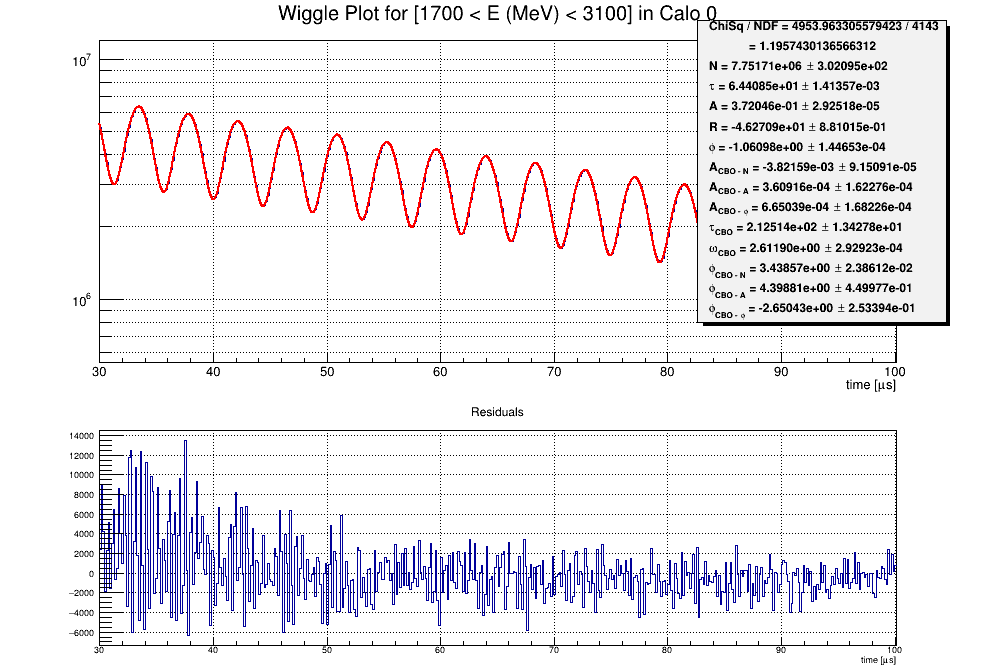

In [33]:
fitter13.Draw(30,100)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


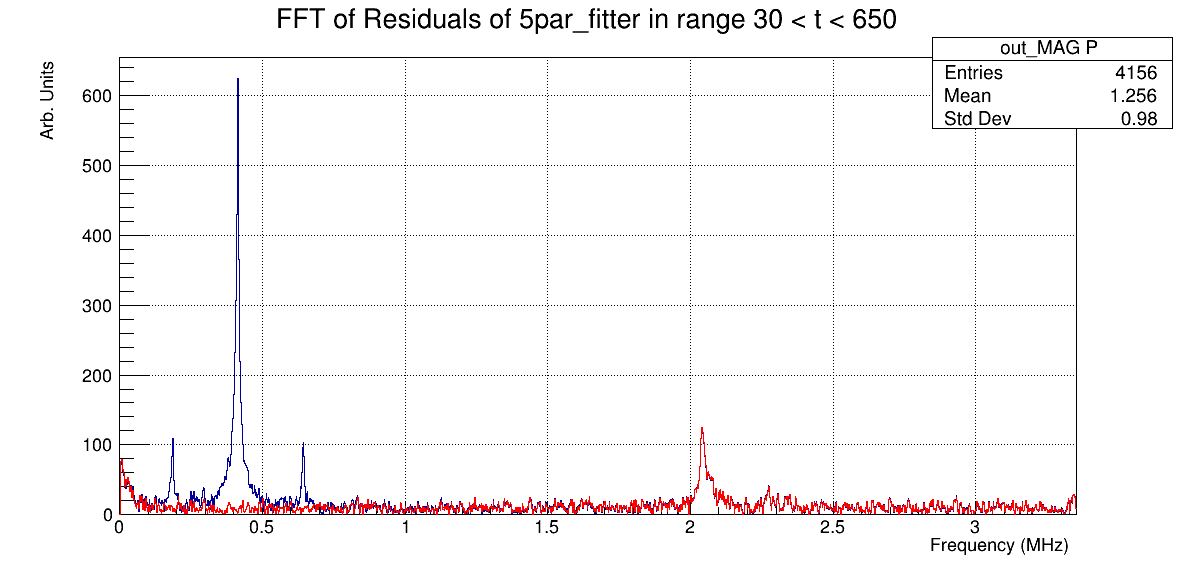

In [34]:
c = r.TCanvas("c","c",1200,600)
fitter.fft.Draw("hist")
fitter13.fft.Draw("hist SAME")
fitter13.fft.SetLineColor(2)
c.SetGrid()
c.Draw()

---

### And now 17-parameter fit, keeping the changing CBO

In [35]:
fitFunc17 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "17par")
fitFunc17.cboFrequencyModel = "elbaFixed"

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [36]:
DumpClass(fitFunc17)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7fec64031828>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7fec640316d8>
    KlossHist = None
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7fec64031828>>, 'custom': <bound method WiggleFit.defineCustomFunction of <omega_a_fitting.WiggleFit 

In [37]:
fit17 = BuildTF1(fitFunc17, 17, "17par", "seventeen_parameter_fit", 30, 650)
fit17.SetParameters([100000.0, 64.32689658986958, -0.41149191856871803, -11.31981267111425, -4.201648334505292, 
                     -0.666502391530784, 0.6927259503578, -0.38908021438317, 200.0, 2.5, 0.4745581246420292, 6.299934663288357, 
                     0.28579778778899545, 0.2, 30.0, 12.83, 0.0])
fit17.SetParLimits(14,1,10000)
fit17.ImportParameters(fitter13.f)
fit17.SetParNames()

In [38]:
fitter17 = WiggleFitter(wiggle.h, fit17, "17par", "REMB", 1)

     [2.89, 79.2, 5.44, 9.2]


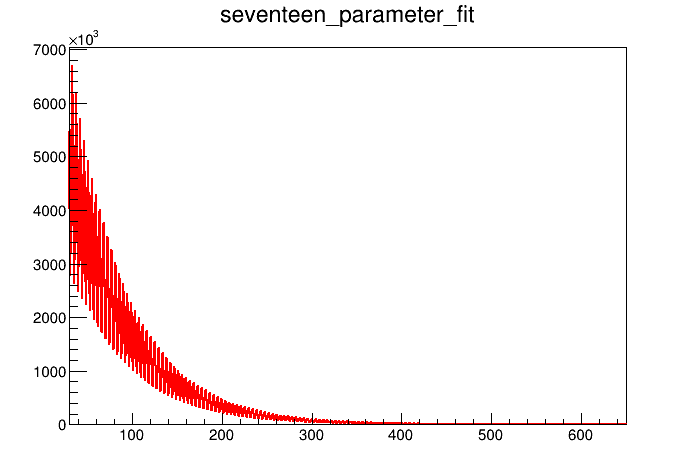

In [39]:
c = r.TCanvas()
fitter17.f.Draw()
c.Draw()

In [40]:
fitter17.PrintParameters()

Parameters from this fit: 
      N  =  7751714.642013996 +/- 0.0
      #tau  =  64.40851236278088 +/- 0.0
      A  =  0.3720462016885506 +/- 0.0
      R  =  -46.27093270796601 +/- 0.0
      #phi  =  -1.0609756553300778 +/- 0.0
      A_{CBO - N}  =  -0.0038215940372692972 +/- 0.0
      A_{CBO - A}  =  0.0003609159990496666 +/- 0.0
      A_{CBO - #phi}  =  0.0006650387780360741 +/- 0.0
      #tau_{CBO}  =  212.51435116931566 +/- 0.0
      #omega_{CBO}  =  2.6119016699164614 +/- 0.0
      #phi_{CBO - N}  =  3.438569115557027 +/- 0.0
      #phi_{CBO - A}  =  4.3988108219640525 +/- 0.0
      #phi_{CBO - #phi}  =  -2.6504268523830476 +/- 0.0
      A_{VW}  =  0.2 +/- 0.0
      #tau_{VW}  =  30.0 +/- 0.0
      #omega_{VW}  =  12.83 +/- 0.0
      #phi_{VW}  =  0.0 +/- 0.0


In [41]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec64031160>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7fffe7464b80>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7fffe7478ef0>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffe7422f60>
    resid = None
    fft = None


In [42]:
fitter17.Fit(2)

Starting fit 1 / 1
Parameters from this fit: 
     ChiSq/NDF =  4478.696463954929 / 4139 = 1.0820721101606496
      N  =  7751710.848227439 +/- 302.1109436771957
      #tau  =  64.40852614481418 +/- 0.0014136107779079193
      A  =  0.372046186899978 +/- 2.9251965621051497e-05
      R  =  -46.29705174834787 +/- 0.8810484218932763
      #phi  =  -1.0609696382510254 +/- 0.0001446640564059197
      A_{CBO - N}  =  -0.0038265347141219585 +/- 9.149745832806573e-05
      A_{CBO - A}  =  -0.000362049223223088 +/- 0.0001623924493996623
      A_{CBO - #phi}  =  -0.000655142947518945 +/- 0.0001682955994426317
      #tau_{CBO}  =  212.00548472357738 +/- 13.353202690056564
      #omega_{CBO}  =  2.6118993914834303 +/- 0.000292923542616434
      #phi_{CBO - N}  =  3.4388440639979305 +/- 0.023850121754468125
      #phi_{CBO - A}  =  7.546502049640679 +/- 0.44893342024234417
      #phi_{CBO - #phi}  =  -5.793999618815389 +/- 0.25743290618394143
      A_{VW}  =  -0.004150861434351894 +/- 0.00067760882

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [43]:
fitter17.PrintParameters()

Parameters from this fit: 
     ChiSq/NDF =  4478.696463954929 / 4139 = 1.0820721101606496
      N  =  7751710.848227439 +/- 302.1109436771957
      #tau  =  64.40852614481418 +/- 0.0014136107779079193
      A  =  0.372046186899978 +/- 2.9251965621051497e-05
      R  =  -46.29705174834787 +/- 0.8810484218932763
      #phi  =  -1.0609696382510254 +/- 0.0001446640564059197
      A_{CBO - N}  =  -0.0038265347141219585 +/- 9.149745832806573e-05
      A_{CBO - A}  =  -0.000362049223223088 +/- 0.0001623924493996623
      A_{CBO - #phi}  =  -0.000655142947518945 +/- 0.0001682955994426317
      #tau_{CBO}  =  212.00548472357738 +/- 13.353202690056564
      #omega_{CBO}  =  2.6118993914834303 +/- 0.000292923542616434
      #phi_{CBO - N}  =  3.4388440639979305 +/- 0.023850121754468125
      #phi_{CBO - A}  =  7.546502049640679 +/- 0.44893342024234417
      #phi_{CBO - #phi}  =  -5.793999618815389 +/- 0.25743290618394143
      A_{VW}  =  -0.004150861434351894 +/- 0.0006776088212403702
      #tau

In [44]:
DumpClass(fitter17)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec64031160>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("17par") at 0x7fffe7464b80>
    f = <ROOT.TF1 object ("17par_fitter") at 0x7fffe7478ef0>
    name = 17par_fitter
    nPar = 17
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7751710.848227439, 64.40852614481418, 0.372046186899978, -46.29705174834787, -1.0609696382510254, -0.0038265347141219585, -0.000362049223223088, -0.000655142947518945, 212.00548472357738, 2.6118993914834303, 3.4388440639979305, 7.546502049640679, -5.793999618815389, -0.004150861434351894, 30.52927836940354, 12.828977111619844, -4.3677948387777]]
    intermediateErrors = [[302.1109436771957, 0.0014136107779079193, 2.9251965621051497e-05, 0.8810484218932763, 0.0001446640564059197, 9.149745832806573e-05, 0.0001623924493996623, 0.0001682955994426317, 13.353202690056564, 0.000292923542616434, 0.023850121754468125, 0.44893342024234

<ROOT.TCanvas object ("c") at 0x7fffe7473390>

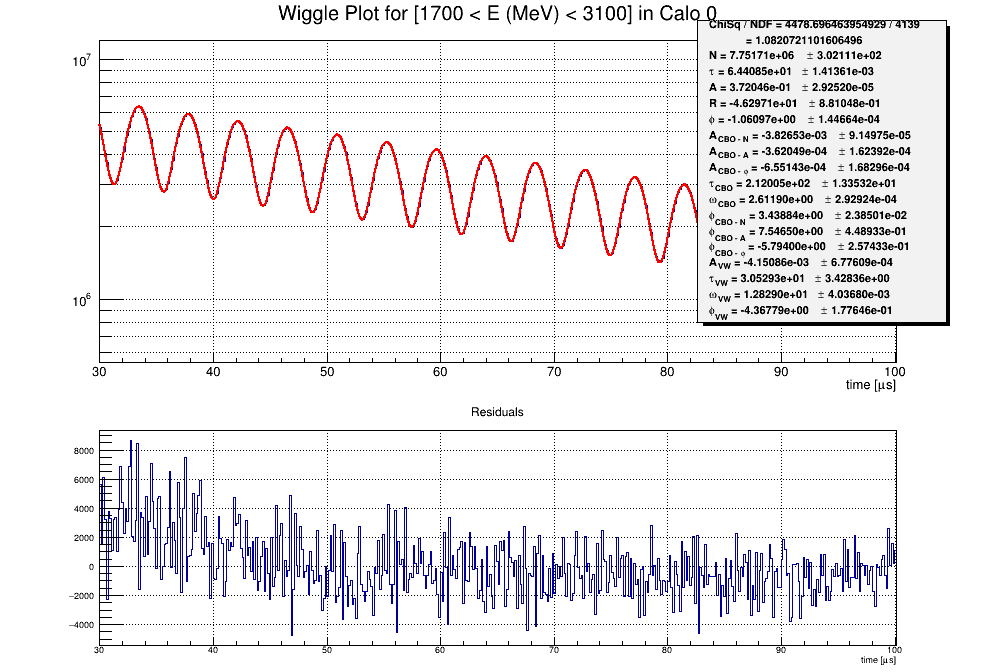

In [45]:
fitter17.Draw(30,100)

In [78]:
fitter17.ComputeFFT()

Warning in <TFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


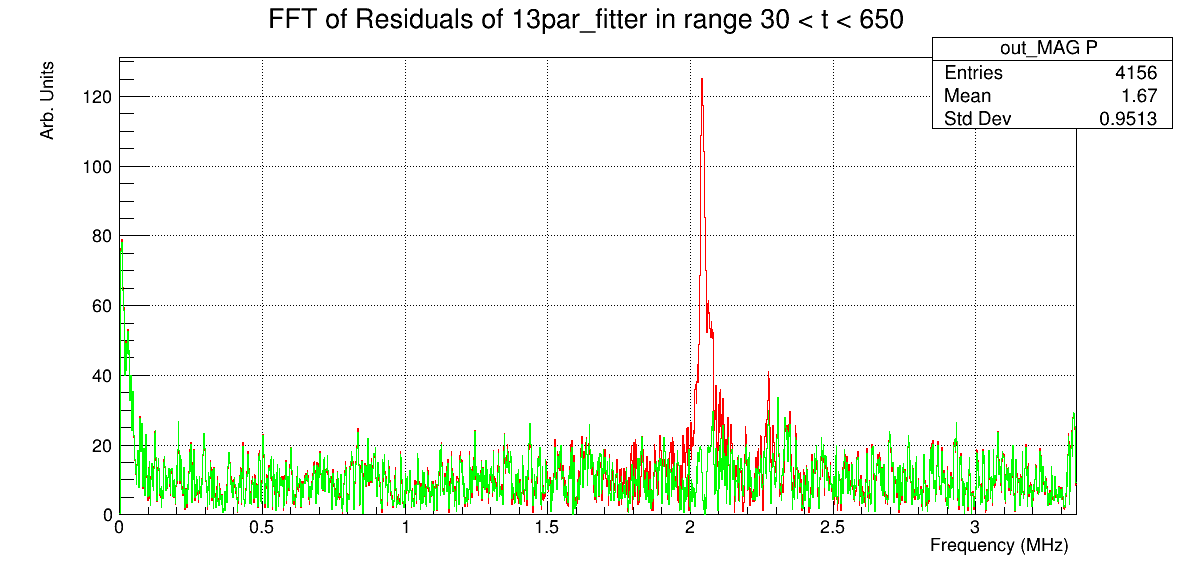

In [47]:
c = r.TCanvas("c","c",1200,600)
#fitter.fft.Draw("hist")
fitter13.fft.Draw("hist ")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
c.SetGrid()
c.Draw()

In [48]:
print([fitter17.f.GetParameter(i) for i in range(17)])

[7751710.848227439, 64.40852614481418, 0.372046186899978, -46.29705174834787, -1.0609696382510254, -0.0038265347141219585, -0.000362049223223088, -0.000655142947518945, 212.00548472357738, 2.6118993914834303, 3.4388440639979305, 7.546502049640679, -5.793999618815389, -0.004150861434351894, 30.52927836940354, 12.828977111619844, -4.3677948387777]


---

### And now with K_{loss}

In [51]:
triples = f2.Get("clustersAndCoincidences").Get("triples")
triples_b = f2.Get("clustersAndCoincidences").Get("backwardsTriples")
print(triples)

<ROOT.TH2I object ("triples") at 0x7fffe74784e0>


In [52]:
lifetimeFirstGuess = fitter17.f.GetParameter(1)

In [53]:
lm = MuonLoss(triples, triples_b, lifetimeFirstGuess, 0, False, calo)

In [54]:
DumpClass(lm)

Dumping:  <lost_muon_calculation.MuonLoss object at 0x7fec64031cf8>
Class:  <class 'lost_muon_calculation.MuonLoss'>
    triples = <ROOT.TH1D object ("triples") at 0x7fffe74d6cd0>
    backwardsTriples = <ROOT.TH1D object ("b_triples") at 0x7fffe74d62c0>
    tau = 64.40852614481418
    subtractBackwards = False
    caloNum = 0
    muonLossHist = <ROOT.TH1D object ("muonLossHist") at 0x7fffe6c64e30>
    iteration = 0


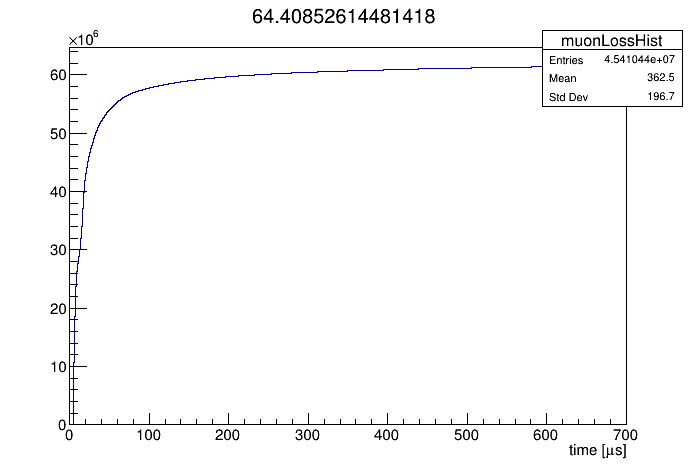

In [55]:
c = r.TCanvas()
lm.muonLossHist.Draw()
c.Draw()

In [56]:
fitFunc18 = WiggleFit(GetBlindingPhrase("./blinding.txt"), "18par")
fitFunc18.initializeKloss( lm.muonLossHist )
fitFunc18.cboFrequencyModel = "elbaFixed"

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [57]:
DumpClass(fitFunc18)

Dumping:  <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>
Class:  <class 'omega_a_fitting.WiggleFit'>
    getBlinded = <BlindersPy3.Blinders object at 0x7fec6406dcf8>
    KlossHist = <ROOT.TH1D object ("KlossHist") at 0x7fffe6c6ab50>
    funcDict = {'5par': <bound method WiggleFit.five_parameter of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, '13par': <bound method WiggleFit.blinded_wiggle_cbo of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, '13par_changing': <bound method WiggleFit.blinded_wiggle_changing_cbo of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, '17par': <bound method WiggleFit.blinded_wiggle_cbo_vw of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, '18par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, '23par': <bound method WiggleFit.blinded_wiggle_cbo_vw_Kloss_changingCBO of <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>>, 'custom': <bound method WiggleFit.defin

In [58]:
fit18 = BuildTF1(fitFunc18, 18, "18par", "eighteen_parameter_fit", 30, 650)
#fit18.SetParameters(pars17)
fit18.SetParLimits(8,1,10000)
fit18.SetParLimits(14,1,10000)
fit18.f.SetParameter(17, (10**(-12)) )
fit18.ImportParameters(fitter17.f)
fit18.SetParNames()

In [64]:
DumpClass(fit18)

Dumping:  <omega_a_fitting.BuildTF1 object at 0x7fec640322e8>
Class:  <class 'omega_a_fitting.BuildTF1'>
    f = <ROOT.TF1 object ("eighteen_parameter_fit") at 0x7fffe781ad80>
    nPar = 18
    name = eighteen_parameter_fit
    fitLow = 30
    fitHigh = 650
    funcRaw = <omega_a_fitting.WiggleFit object at 0x7fec6406dd30>
    kind = 18par
    nameDict = {'5par': ['N', '#tau_{#mu}', 'A', 'R', '#phi_{a}'], '13par': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#phi_{CBO - A}', '#phi_{CBO - #phi}'], '13par_changing': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#phi_{CBO - A}', '#phi_{CBO - #phi}', '#delta#omega_{CBO}', 'A_{CBO}', '#tau_{CBO - A}', 'B_{CBO}', '#tau_{CBO - B}'], '17par': ['N', '#tau', 'A', 'R', '#phi', 'A_{CBO - N}', 'A_{CBO - A}', 'A_{CBO - #phi}', '#tau_{CBO}', '#omega_{CBO}', '#phi_{CBO - N}', '#phi_{CBO 

In [69]:
fitter18 = WiggleFitter(wiggle.h, fit18, "18par", "REMB", 1)

In [70]:
fitter18.PrintParameters()

Parameters from this fit: 
      N  =  7751710.848227439 +/- 0.0
      #tau  =  64.40852614481418 +/- 0.0
      A  =  0.372046186899978 +/- 0.0
      R  =  -46.29705174834787 +/- 0.0
      #phi  =  -1.0609696382510254 +/- 0.0
      A_{CBO - N}  =  -0.0038265347141219585 +/- 0.0
      A_{CBO - A}  =  -0.000362049223223088 +/- 0.0
      A_{CBO - #phi}  =  -0.000655142947518945 +/- 0.0
      #tau_{CBO}  =  212.00548472357738 +/- 0.0
      #omega_{CBO}  =  2.6118993914834303 +/- 0.0
      #phi_{CBO - N}  =  3.4388440639979305 +/- 0.0
      #phi_{CBO - A}  =  7.546502049640679 +/- 0.0
      #phi_{CBO - #phi}  =  -5.793999618815389 +/- 0.0
      A_{VW}  =  -0.004150861434351894 +/- 0.0
      #tau_{VW}  =  30.52927836940354 +/- 0.0
      #omega_{VW}  =  12.828977111619844 +/- 0.0
      #phi_{VW}  =  -4.3677948387777 +/- 0.0
      K_{loss}  =  1e-12 +/- 0.0


In [71]:
DumpClass(fitter18)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec64031a20>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("18par") at 0x7fffe74ce830>
    f = <ROOT.TF1 object ("18par_fitter") at 0x7fffe77ebed0>
    name = 18par_fitter
    nPar = 18
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = []
    intermediateErrors = []
    intermediateChi2 = []
    pt = <ROOT.TPaveText object ("TPave") at 0x7fffe754af20>
    resid = None
    fft = None


In [72]:
fitter18.Fit(2)

Starting fit 1 / 1
     [2.89, 79.2, 5.44, 9.2]
Parameters from this fit: 
     ChiSq/NDF =  4253.330933815594 / 4138 = 1.0278711778191383
      N  =  7826809.621394733 +/- 5009.701171107381
      #tau  =  64.43725158158007 +/- 0.0023799242063074206
      A  =  0.3720619407732514 +/- 2.927125717373428e-05
      R  =  -46.5458920082627 +/- 0.8807596917852157
      #phi  =  -1.0609132422373528 +/- 0.0001446587253150599
      A_{CBO - N}  =  -0.0038739978198471118 +/- 9.295151068746794e-05
      A_{CBO - A}  =  -0.0002986780273414512 +/- 0.00016357899367849935
      A_{CBO - #phi}  =  -0.0005968653419231348 +/- 0.00016959828009264152
      #tau_{CBO}  =  207.1680218583828 +/- 12.879384820177947
      #omega_{CBO}  =  2.611953936968986 +/- 0.00029286085942933996
      #phi_{CBO - N}  =  3.432550101376742 +/- 0.02372183758240481
      #phi_{CBO - A}  =  7.694219262994921 +/- 0.5484607739154088
      #phi_{CBO - #phi}  =  -5.593141356808982 +/- 0.2846122512378564
      A_{VW}  =  -0.00416025

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present


In [73]:
DumpClass(fitter18)

Dumping:  <omega_a_fitting.WiggleFitter object at 0x7fec64031a20>
Class:  <class 'omega_a_fitting.WiggleFitter'>
    h = <ROOT.TH1D object ("18par") at 0x7fffe74ce830>
    f = <ROOT.TF1 object ("18par_fitter") at 0x7fffe77ebed0>
    name = 18par_fitter
    nPar = 18
    fitOptions = REMB
    nFit = 1
    fitLow = 30
    fitHigh = 650
    intermediateParameters = [[7826809.621394733, 64.43725158158007, 0.3720619407732514, -46.5458920082627, -1.0609132422373528, -0.0038739978198471118, -0.0002986780273414512, -0.0005968653419231348, 207.1680218583828, 2.611953936968986, 3.432550101376742, 7.694219262994921, -5.593141356808982, -0.0041602591967957675, 30.444170419744957, 12.829848846108717, -4.41412104899805, 1.8313167445514547e-10]]
    intermediateErrors = [[5009.701171107381, 0.0023799242063074206, 2.927125717373428e-05, 0.8807596917852157, 0.0001446587253150599, 9.295151068746794e-05, 0.00016357899367849935, 0.00016959828009264152, 12.879384820177947, 0.00029286085942933996, 0.0237218

<ROOT.TCanvas object ("c") at 0x7fffe74f04a0>

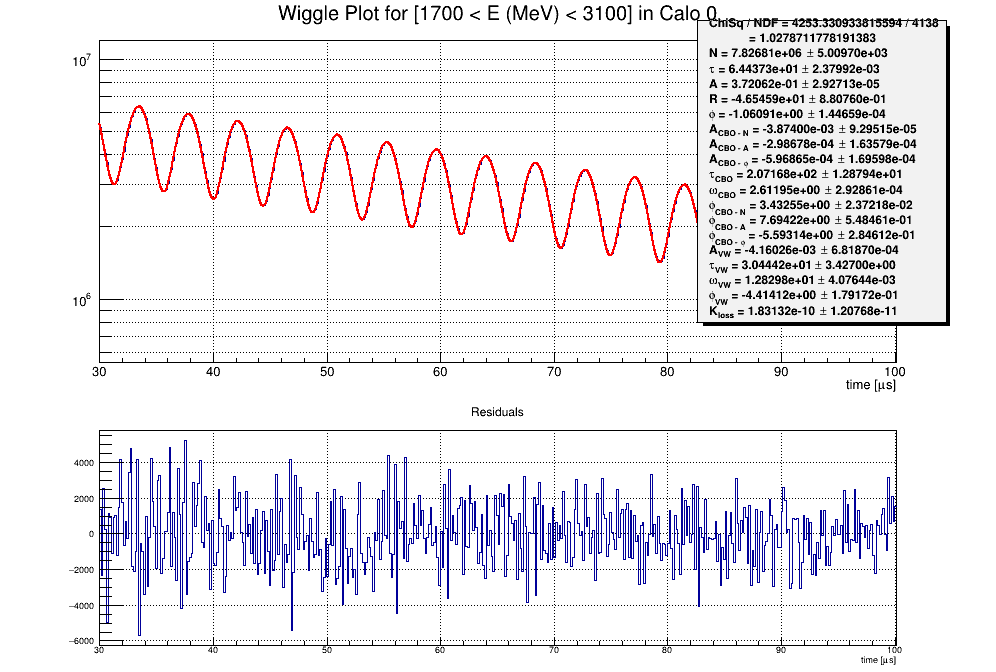

In [74]:
fitter18.Draw(30,100)

<ROOT.TCanvas object ("c") at 0x7fffe743e980>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


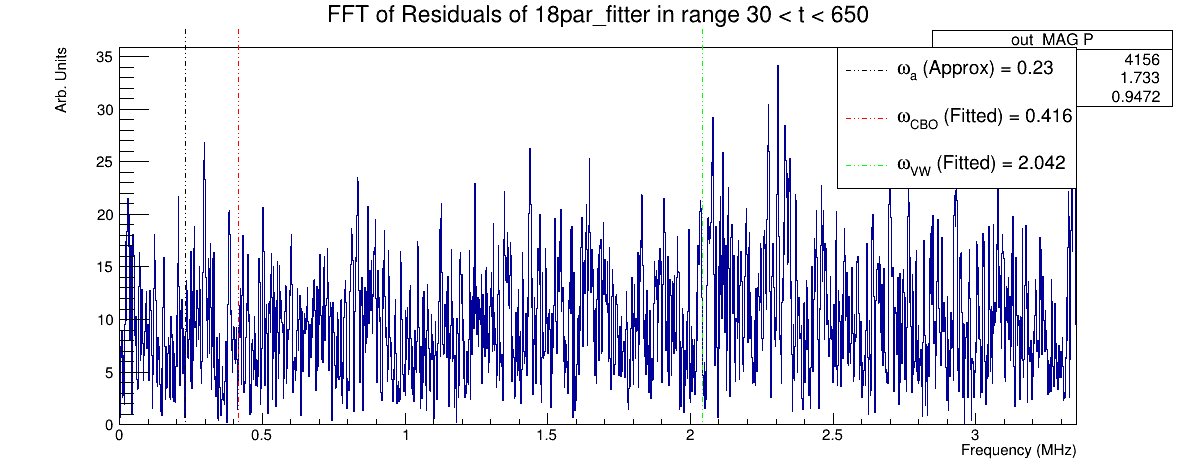

In [75]:
#fitter18.f.SetParameter(8,180)
fitter18.ComputeFFT()
fitter18.DrawFFT([0.23, fitter18.f.GetParameter(9)/(2*r.TMath.Pi()), fitter18.f.GetParameter(15)/(2*r.TMath.Pi())]
                 ,["#omega_{a} (Approx)", "#omega_{CBO} (Fitted)", "#omega_{VW} (Fitted)"])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


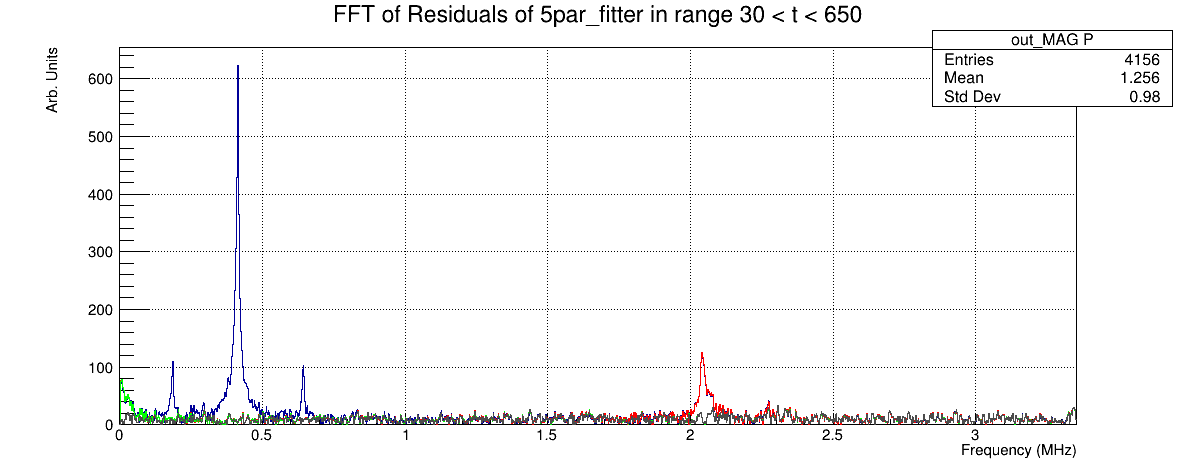

In [79]:
c = r.TCanvas("c","c",1200,500)
#fitter.fft.Draw("hist")
fitter.fft.Draw("hist ")
fitter13.fft.Draw("hist SAME")
fitter17.fft.Draw("hist SAME")
fitter17.fft.SetLineColor(3)
fitter18.fft.Draw("hist SAME")
fitter18.fft.SetLineColor(12)
c.SetGrid()
c.Draw()

In [80]:
SaveToRootFile(fitter18, "18ParameterFit_ChangingCBO_PileupCorrectedByScan")

Saving class <omega_a_fitting.WiggleFitter object at 0x7fec64031a20>  to file  18ParameterFit_ChangingCBO_PileupCorrectedByScan_2019_07_22_19_53_05.root
This type of list is not supported: [<ROOT.TLine object ("TLine") at 0x7fffe77fb580>, <ROOT.TLine object ("TLine") at 0x7fffe760d160>, <ROOT.TLine object ("TLine") at 0x7fffe77da6f0>]
Type not supported <class 'ROOT.TLegend'>


In [81]:
fitter18.DumpParameters()

[(7826809.621394733, 5009.701171107381),
 (64.43725158158007, 0.0023799242063074206),
 (0.3720619407732514, 2.927125717373428e-05),
 (-46.5458920082627, 0.8807596917852157),
 (-1.0609132422373528, 0.0001446587253150599),
 (-0.0038739978198471118, 9.295151068746794e-05),
 (-0.0002986780273414512, 0.00016357899367849935),
 (-0.0005968653419231348, 0.00016959828009264152),
 (207.1680218583828, 12.879384820177947),
 (2.611953936968986, 0.00029286085942933996),
 (3.432550101376742, 0.02372183758240481),
 (7.694219262994921, 0.5484607739154088),
 (-5.593141356808982, 0.2846122512378564),
 (-0.0041602591967957675, 0.0006818698401657356),
 (30.444170419744957, 3.4270023433374153),
 (12.829848846108717, 0.004076439612004744),
 (-4.41412104899805, 0.17917211121003543),
 (1.8313167445514547e-10, 1.2076831264121304e-11)]